## How to use MagPy:

MagPy can simulate quantum systems evolving under the Liouville-von Neumann equation,
$$\frac{\partial\rho(t)}{\partial t} = -i\big[H(t),\,\rho(t)\big],$$
given a Hamiltonian $H$ and an initial condition $\rho_0$.

A constant Hamiltonian is represented by an HOp object, which can be passed information to construct the Hamiltonian in two ways:

1. Pass a square NumPy array directly:

In [3]:
import magpy as mp
import numpy as np

import scipy as scipy
from HOp import HOp
from methods import *
from QSystem import QSystem

# H = HOp(np.array([[1,1],[1,1]]))
# H1 = HOp(2, 1, sigmax())
# H2 = HOp(2, (1, sigmay()), (2, sigmax()))
# Hcm = HOp(2,precession_Z=np.array([2,9]),coupling_matrix_XX=np.array([[3,2],[5,7]]),coupling_matrix_YY=np.array([[3,2],[5,7]]),coupling_matrix_ZZ=np.array([[3,2],[5,7]]))
Hcm = HOp(3,coupling_matrix_XX=np.array([[3,2,6],[5,7,8],[9,4,1]]),coupling_matrix_YY=np.array([[3,2,6],[5,7,8],[9,4,1]]),coupling_matrix_ZZ=np.array([[3,2,6],[5,7,8],[9,4,1]]))
# Hcm = HOp(2,coupling_matrix_YY=np.array([[3,2],[5,7]]))
# Hcm = HOp(2,precession_Z=np.array([1,1]))

AttributeError: 'function' object has no attribute 'data'

In [11]:
def sumZkZkplus1(n): 
    Hn1 = np.zeros(2**n)
    if n == 1:
        Hn1 = Hn1
    else:
        operatorcount1 = 1
        while operatorcount1<n:
            i = operatorcount1
            operators = kron(sigmaz(),sigmaz())

            rightI = n-i
            leftI = i
            rightcount = 0
            leftcount = 0

            while rightI < n-1:
                operators = kron(eye(2),operators)
                rightI = rightI+1
                rightcount = rightcount+1

            while leftI < n-1:
                operators = kron(operators,eye(2))
                leftI = leftI+1
                leftcount = leftcount +1

            Hn1 = operators+Hn1
            operatorcount1 = operatorcount1+1
    return Hn1


# sumXk, sumYk, sumZk

def sumXk(n):
    Hn2 = np.zeros(2**n)
    operatorcount2 = 1
    while operatorcount2<=n:
        i = operatorcount2
        operators = sigmax()

        rightI = n-i+1
        leftI = i
        rightcount = 0
        leftcount = 0

        while rightI < n:
            operators = kron(eye(2),operators)
            rightI = rightI+1
            rightcount = rightcount+1

        while leftI < n:
            operators = kron(operators,eye(2))
            leftI = leftI+1
            leftcount = leftcount +1

        Hn2 = operators+Hn2
        operatorcount2 = operatorcount2+1
    return Hn2



def sumYk(n):
    Hn3 = np.zeros(2**n)
    operatorcount3 = 1
    while operatorcount3<=n:
        i = operatorcount3
        operators = sigmay()

        rightI = n-i+1
        leftI = i
        rightcount = 0
        leftcount = 0

        while rightI < n:
            operators = kron(eye(2),operators)
            rightI = rightI+1
            rightcount = rightcount+1

        while leftI < n:
            operators = kron(operators,eye(2))
            leftI = leftI+1
            leftcount = leftcount +1

        Hn3 = operators+Hn3
        operatorcount3 = operatorcount3+1
    return Hn3


def sumZk(n):
    Hn3 = np.zeros(2**n)
    operatorcount3 = 1
    while operatorcount3<=n:
        i = operatorcount3
        operators = sigmaz()

        rightI = n-i+1
        leftI = i
        rightcount = 0
        leftcount = 0

        while rightI < n:
            operators = kron(eye(2),operators)
            rightI = rightI+1
            rightcount = rightcount+1

        while leftI < n:
            operators = kron(operators,eye(2))
            leftI = leftI+1
            leftcount = leftcount +1

        Hn3 = operators+Hn3
        operatorcount3 = operatorcount3+1
    return Hn3

#sumOmegakXk
def sumOmegakXk(n,Omega):
    Hn3 = np.zeros(2**n)
    operatorcount3 = 1
    while operatorcount3<=n:
        i = operatorcount3
        operators = Omega[n-i]*X

        rightI = n-i+1
        leftI = i
        rightcount = 0
        leftcount = 0

        while rightI < n:
            operators = kron(eye(2),operators)
            rightI = rightI+1
            rightcount = rightcount+1

        while leftI < n:
            operators = kron(operators,eye(2))
            leftI = leftI+1
            leftcount = leftcount +1

        Hn3 = operators+Hn3
        operatorcount3 = operatorcount3+1
    return Hn3

#sumOmegakYk
def sumOmegakYk(n,Omega):
    Hn3 = np.zeros(2**n)
    operatorcount3 = 1
    while operatorcount3<=n:
        i = operatorcount3
        operators = Omega[n-i]*Y

        rightI = n-i+1
        leftI = i
        rightcount = 0
        leftcount = 0

        while rightI < n:
            operators = kron(eye(2),operators)
            rightI = rightI+1
            rightcount = rightcount+1

        while leftI < n:
            operators = kron(operators,eye(2))
            leftI = leftI+1
            leftcount = leftcount +1

        Hn3 = operators+Hn3
        operatorcount3 = operatorcount3+1
    return Hn3

    
#sumOmegakZk
def sumOmegakZk(n,Omega):
    Hn3 = np.zeros(2**n)
    operatorcount3 = 1
    while operatorcount3<=n:
        i = operatorcount3
        operators = Omega[n-i]*sigmaz()

        rightI = n-i+1
        leftI = i
        rightcount = 0
        leftcount = 0

        while rightI < n:
            operators = kron(eye(2),operators)
            rightI = rightI+1
            rightcount = rightcount+1

        while leftI < n:
            operators = kron(operators,eye(2))
            leftI = leftI+1
            leftcount = leftcount +1

        Hn3 = operators+Hn3
        operatorcount3 = operatorcount3+1
    return Hn3


# sumJjkXjXk, sumJjkYjYk, sumJjkZjZk

def sumJjkXjXk(n,J):
    H = np.zeros(2**n)
    j = 1

    while j<n:
        m = 1
        op = sigmax()

        op1 = op
        while m<j:
            op1 = kron(op1,eye(2))
            m = m+1
    
        k = j + 1
        while k<n+1:
            op2 = op1
            i = m+1
            while i<k:
                op2 = kron(eye(2),op2)
                i = i+1

            op3 = kron(sigmax(),op2)
            op4 = op3
            i = i+1

            while i<n+1:
                op4 = kron(eye(2),op4)
                i = i+1

            H = H + op4 * J[j-1,k-1]
            k = k+1
        
        j = j+1

    return H


def sumJjkYjYk(n,J):
    H = np.zeros(2**n)
    j = 1

    while j<n:
        m = 1
        op = sigmay()

        op1 = op
        while m<j:
            op1 = kron(op1,eye(2))
            m = m+1
    
        k = j + 1
        while k<n+1:
            op2 = op1
            i = m+1
            while i<k:
                op2 = kron(eye(2),op2)
                i = i+1

            op3 = kron(sigmay(),op2)
            op4 = op3
            i = i+1

            while i<n+1:
                op4 = kron(eye(2),op4)
                i = i+1

            H = H + op4 * J[j-1,k-1]
            k = k+1
        
        j = j+1

    return H



def sumJjkZjZk(n,J):
    H = np.zeros(2**n)
    j = 1

    while j<n:
        m = 1
        op = sigmaz()

        op1 = op
        while m<j:
            op1 = kron(op1,eye(2))
            m = m+1
    
        k = j + 1
        while k<n+1:
            op2 = op1
            i = m+1
            while i<k:
                op2 = kron(eye(2),op2)
                i = i+1

            op3 = kron(sigmaz(),op2)
            op4 = op3
            i = i+1

            while i<n+1:
                op4 = kron(eye(2),op4)
                i = i+1

            H = H + op4 * J[j-1,k-1]
            k = k+1
        
        j = j+1

    return H


#%% Now define Hamiltonians

def IsingH(n,J,g,h):

    Hn1 = sumZkZkplus1(n)
    Hn1 = J*Hn1
    Hn2 = sumXk(n)
    Hn2 = g*Hn2
    Hn3 = sumZk(n)
    Hn3 = h*Hn3

    Hn = Hn1+Hn2+Hn3

    return Hn


def NMRH(n,Omega,J,f,g):

    HCS = sumOmegakZk(n,Omega)
    
    HJX = sumJjkXjXk(n,J)
    HJY = sumJjkYjYk(n,J)
    HJZ = sumJjkZjZk(n,J)
    HJ = HJX + HJY + HJZ  
    
    HPX = f * sumXk(n)
    HPY = g * sumYk(n)
    HP = HPX + HPY

    H = HCS + HJ + HP

    return H

# time dependent NMR
def NMRHdep(n,Omega,J,f_function,g_function,t):

    HCS = sumOmegakZk(n,Omega)
    
    HJX = sumJjkXjXk(n,J)
    HJY = sumJjkYjYk(n,J)
    HJZ = sumJjkZjZk(n,J)
    HJ = HJX + HJY + HJZ  
    
    HPX = f_function(t) * sumXk(n)
    HPY = g_function(t) * sumYk(n)
    HP = HPX + HPY

    H = HCS + HJ + HP

    return H

NMRH(3,np.array([0,0,0]),np.array([[3,2,6],[5,7,8],[9,4,1]]),0,0)

2. Specify a number of spins, along with a 2x2 array corresponding to each spin. Any spin not accounted for will be assigned the identity matrix:

$\;\;\;\;\;\;\;\;H_1 = \sigma_x \otimes Id,\;\;\;\;H_2 = \sigma_y \otimes \sigma_x.$

In [66]:
H1 = HOp(2, 1, sigmax())
H2 = HOp(2, (1, sigmay()), (2, sigmax()))
H3 = HOp(2, (1, sigmay()), (2, sigmax()))

In [67]:
H2 == H3

False

3. Specify a precession vector and a coupling matrix corresponding to the spins.

$\;\;\;\;\;\;\;\;H_{CS} = \sum_{k=1}^N \Omega_k Z_k $

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;= \Omega_1 \cdot \sigma_z \otimes Id \otimes \cdots \otimes Id \; \; + \;\;  \Omega_2 \cdot Id \otimes \sigma_z \otimes Id \otimes \cdots \otimes Id \; \; + \;\;  \cdots  \; \; + \;\;  \Omega_N \cdot  Id \otimes \cdots \otimes Id \otimes \sigma_z$

$\;\;\;\;\;\;\;\;H_{J} = \sum_{j=1}^N \sum_{k=j+1}^N J_{jk} (X_jX_k + Y_jY_k + Z_jZ_k)$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \sum_{j=1}^N \sum_{k=j+1}^N J_{jk} \cdot Id \otimes \underbrace{\sigma_x}_{j\text{th\; spin}} \otimes Id \otimes \cdots \otimes Id \otimes \underbrace{\sigma_x}_{k\text{th\; spin}} \otimes Id$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; + \sum_{j=1}^N \sum_{k=j+1}^N J_{jk} \cdot Id \otimes \underbrace{\sigma_y}_{j\text{th\; spin}} \otimes Id \otimes \cdots \otimes Id \otimes \underbrace{\sigma_y}_{k\text{th\; spin}} \otimes Id$

$\;\;\;\;\;\;\;\;\;\;\;\;\;\; + \sum_{j=1}^N \sum_{k=j+1}^N J_{jk} \cdot Id \otimes \underbrace{\sigma_z}_{j\text{th\; spin}} \otimes Id \otimes \cdots \otimes Id \otimes \underbrace{\sigma_z}_{k\text{th\; spin}} \otimes Id$


In [3]:
H = HOp(2,precession_Z=np.array([2,9]),coupling_matrix_XX=np.array([[3,2],[5,7]]),coupling_matrix_YY=np.array([[3,2],[5,7]]),coupling_matrix_ZZ=np.array([[3,2],[5,7]]))

For the Hamiltonian $H(t) = \sum_{k=1}^N f_k(t) X_k $, the user is asked to specify each f_k(t), then the Hamitonian would be given by


In [25]:
n = 3

def f1(t): return t
def f2(t): return t**2
def f3(t): return t**3

H = {}
function_list = [f1, f2, f3]

for i in range(n):
    H[function_list[i]]= HOp(n, i, sigmax())


For the Hamiltonian $H(t) = f_1(t) (X_1+X_3+X_5) + f_2(t) (X_2+X_7) $, the user is asked to specify each f_k(t) and where do they act, then the Hamitonian would be given by


In [109]:
n = 7

def f1(t): return t
def f2(t): return t**2

# where each function acts on
f1_indices = [1,3,5]
f2_indices = [2,7]

# also need to defined where is no operation
def f3(t): return 0
f3_indices = [4,6]

function_dictionary = {f1:f1_indices, f2:f2_indices, f3:f3_indices}

# check if disjoint and union cover everything:
def checksets(n,list_of_sets):
    universeset = set(list(range(1, n+1)))
    set_list = []
    element_number = 0
    for i in range(len(list_of_sets)):
        element_number = element_number + len(list_of_sets[i])
        set_list.append(set(list_of_sets[i]))
    a = (universeset == set.union(*set_list))
    b = (len(universeset) == element_number)
    return (a+b)/2


def get_HOp_dictionary(n,function_dictionary):

    if checksets(n,list(function_dictionary.values())) == 1:
        H = {}
        for functionindex in range(len(function_dictionary)):
            for spinindex in list(function_dictionary.values())[functionindex]:
                H[[*function_dictionary][functionindex]]= HOp(n, spinindex, sigmax())
        return H

    else: 
        raise ValueError("invalid input")

H = get_HOp_dictionary(n,function_dictionary)

The full, time-dependent Hamiltonian is then specified as a dictionary of functional coefficients paired with an HOp object. If a function corresponds to multiple Hamiltonians, it is paired with a list of HOp objects.

For the Hamiltonian $H(t) = t(\sigma_x\otimes Id) + t(Id\otimes\sigma_y) + t^2(\,\sigma_y\otimes\sigma_x)$:

In [ ]:
def f(t): return t
def g(t): return t**2

H = {f : [H1, HOp(2, 2, sigmay())], g : H2}

In [ ]:
def something(*args, **kwargs):
        """
        Construct matrix representing the quantum operator.
        """

        if not args:
            raise TypeError("input cannot be empty")

        if 'coupling_matrix' in kwargs:
            print('coupling_matrix')

        else:
            return args

something(1,coupling_matrix = 1)


In [2]:
Hcm = HOp(1,coupling_matrix=1)

IndexError: tuple index out of range

In [3]:
# problem here as well? Should allow something better than manually input.
def f(t): return t
def g(t): return t**2

H = {f : [H1, HOp(2, 2, sigmay())], g : H2}
def XXcoupling(n,J):
    H = {}
    j = 1
    while j<n:
        k = j+1
        while k<n+1:
            # HXXjk = {J[j-1,k-1]:HOp(n, (j, sigmax()), (k, sigmax()))}
            # index = ((n-1)+(n-j+1))*(j-1)/2 + k - j - 1
            # H.append(HXXjk)
            H[J[j-1,k-1]]=HOp(n, (j, sigmax()), (k, sigmax()))
            k = k+1
        j = j+1
    
    return H

H

{<function __main__.f(t)>: [<HOp.HOp at 0x7f879de44c10>,
 <function __main__.g(t)>: <HOp.HOp at 0x7f879de45660>}

In [99]:
type([H1, HOp(2, 2, sigmay())])

list

In [134]:
J = np.array([[1,2],[4,5],[7,8],[1,2]])
Omega = np.array([1,2,3,4])
H = {f : [H1, HOp(2, 2, sigmay()),H2], g : H2}

# XX coupling
# J[j-1,k-1]

#sumJjkXjXk
def XXcoupling(n,J):
    H = {}
    j = 1
    while j<n:
        k = j+1
        while k<n+1:
            # HXXjk = {J[j-1,k-1]:HOp(n, (j, sigmax()), (k, sigmax()))}
            # index = ((n-1)+(n-j+1))*(j-1)/2 + k - j - 1
            # H.append(HXXjk)
            H[J[j-1,k-1]]=HOp(n, (j, sigmax()), (k, sigmax()))
            k = k+1
        j = j+1
    
    return H

def sumOmegakZk(n,Omega):
    H = []
    for i in range(n):
        H.append=HOp(n,i+1, Omega[i]*sigmaz())
    
    return H

H = sigmax()Xcoupling(2,J)
H
# type(H)

{2: <HOp.HOp at 0x7f8769815000>}

In [2]:
J = np.array([[1,2,3,4],[4,5,3,4],[7,8,4,4],[1,2,2,5]])
H = {f : [H1, HOp(2, 2, sigmay()),H2], g : H2}

# XX coupling
# J[j-1,k-1]

#sumJjkXjXk
def XXcoupling(n,J):
    H = []
    j = 1
    while j<n:
        k = j+1
        while k<n+1:
            # HXXjk = {J[j-1,k-1]:HOp(n, (j, sigmax()), (k, sigmax()))}
            # index = ((n-1)+(n-j+1))*(j-1)/2 + k - j - 1
            # H.append(HXXjk)
            # H[J[j-1,k-1]]=HOp(n, (j, sigmax()), (k, sigmax()))
            H.append(HOp(n, (j, J[j-1,k-1]*sigmax()), (k, sigmax())))
            k = k+1
        j = j+1
    
    return H

# example
H = sigmax()Xcoupling(3,J)
H
# type(H)

NameError: name 'f' is not defined

In [113]:
def XXYYZZcoupling(n,J):
    H = []
    j = 1
    while j<n:
        k = j+1
        while k<n+1:
            # may need some handle to switch on/off each XX, YY, ZZ
            H.append(HOp(n, (j, J[j-1,k-1]*sigmax()), (k, sigmax())))
            H.append(HOp(n, (j, J[j-1,k-1]*sigmay()), (k, sigmay())))
            H.append(HOp(n, (j, J[j-1,k-1]*sigmaz()), (k, sigmaz())))
            k = k+1
        j = j+1
    
    return H

In [126]:
# use this
# better code
def XXYYZZcoupling(n,coupling_matrix):
    H = []
    for j in range(n-1):
        k = j+1
        for k in range(j+1,n):
            # may need some handle to switch on/off each XX, YY, ZZ
            H.append(HOp(n, (j+1, coupling_matrix[j,k]*sigmax()), (k+1, sigmax())))
            H.append(HOp(n, (j+1, coupling_matrix[j,k]*sigmay()), (k+1, sigmay())))
            H.append(HOp(n, (j+1, coupling_matrix[j,k]*sigmaz()), (k+1, sigmaz())))
    
    def identity(t): return 1
    H = {identity: H}

    return H

In [138]:
def sumOmegakZk(n,Omega):
    H = []
    for i in range(n):
        H.append(HOp(n,i+1, Omega[i]*sigmaz()))
    def identity(t): return 1
    H = {identity: H}
    return H

In [145]:
H = {**XXYYZZcoupling(2,J),**sumOmegakZk(2,Omega)}

In [121]:
H = sigmax()XYYZZcoupling(2,J)
H

Passing this Hamiltonian to the System class creates an object representing a quantum system with that specific Hamiltonian. This object will perform the necessary pre-calculations and store the results to speed up simulation multiple times.

In [ ]:
# H1 = {}
for coeff in H:
    if isinstance(H[coeff], HOp):
        # convert single HOp to list of (single) HOp
        H[coeff] = [H[coeff]]

    matrices = []
    for matrix in H[coeff]:
        matrices.append(liouvillian(matrix()))
    
    # H1[coeff] = matrices




In [70]:
H1 = HOp(2, 1, sigmax())
H2 = HOp(2, (1, sigmay()), (2, sigmax()))
type(H2)

HOp.HOp

In [6]:
# problem here as well? Should allow something better than manually input.
def f(t): return t
def g(t): return t**2

def identity_func(t): return t
def zero_func(t): return t

# H = {f : [H1, HOp(2, 2, sigmay())]}
H = {f: Hcm}
H

{<function __main__.f(t)>: <HOp.HOp at 0x7fa76eeb5990>}

In [16]:
J = np.array([[1,2],[4,5],[7,8],[1,2]])
H = {f : [H1, HOp(2, 2, sigmay()),H2], g : H2}

# XX coupling
# J[j-1,k-1]

#sumJjkXjXk
def XXcoupling(n,J):
    H = {}
    j = 1
    while j<n:
        k = j+1
        while k<n+1:
            # HXXjk = {J[j-1,k-1]:HOp(n, (j, sigmax()), (k, sigmax()))}
            # index = ((n-1)+(n-j+1))*(j-1)/2 + k - j - 1
            # H.append(HXXjk)
            H[J[j-1,k-1]] = HOp(n, (j, sigmax()), (k, sigmax()))
            k = k+1
        j = j+1
    
    return H

H
# type(H)

{2: <HOp.HOp at 0x7f87a035b3d0>}

In [95]:
scipy.integrate.quad(f, 0, 1)

(0.5, 5.551115123125783e-15)

In [103]:
quantum_system = QSystem(H)

rho0 = HOp(3, 1, sigmax())
tlist = timegrid(0, 5, 0.5**7)

density_matrices = quantum_system.lvn_solve(rho0, tlist)

In [15]:
H

{<function __main__.f(t)>: [<HOp.HOp at 0x7f879ef87c40>,
  <HOp.HOp at 0x7f879ef9e350>]}

In [124]:
len(density_matrices)

641

The expectation value of specific operators on the system can then be plotted using the Frobenius inner product and matplotlib. For example, the x-component of the first spin.

/Users/guannan/opt/anaconda3/envs/MagPy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


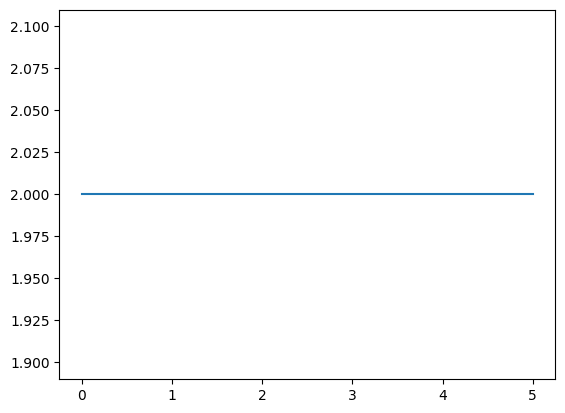

In [104]:
import matplotlib.pyplot as plt

x_components = frobenius(density_matrices, kron(sigmax(), eye(2))) / 4

plt.plot(tlist, x_components)
plt.show()